In [367]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [368]:
%matplotlib inline

In [369]:
nyc_df = pd.read_pickle('NYC_LEED_energy_for_FRIDAY.pkl')

In [370]:
nyc_df.fillna(0)

,"NYC Borough, Block, and Lot (BBL)_x",LEED ID,NYC Building ID,ID,Isconfidential,ProjectName,Street,City,State,Zipcode,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,1010477502,10000300,1025451,10000300,No,Hearst Headquarters,959 Eighth Ave,New York,NY,10019,...,No,None,0,0,0,0,0,870000,0,1
1,1010477502,1000016698,1025451,10000300,No,Hearst Headquarters,959 Eighth Ave,New York,NY,10019,...,No,None,0,0,0,0,0,870000,0,1
2,1011050029,10000920,1081009,10000920,No,The Helena,601 West 57th Street,New York,NY,10019,...,Yes,ABS,Not Available,3445.3,1779.8,1665.5,549303,547239,Multifamily Housing,1
3,1000160195,10001137,1086507,10001137,No,"Tribeca Green, Battery Park City",325 North End Ave,New York,NY,10282,...,Yes,None,Not Available,2198.6,1344.5,854.1,322505,356483,Multifamily Housing,1
4,1005440048,10001291,1008779,10001291,No,Cooper Union New Academic Building,30 Cooper Square,New York,NY,10003-7120,...,No,Manual,66,351.1,124.3,226.8,57450,52192,Office,1
5,1010817502,10001324,1087777,10001324,No,Clinton Green,783 Tenth Avenue,New York,NY,10019,...,No,None,Not Available,2296.6999999999998,1428.7,868,257796,415288,Multifamily Housing,1
6,1010817502,10001324,1087777,10085213,No,The 52nd Street Project,515 West 52nd St,New York,NY,10019,...,No,None,Not Available,2296.6999999999998,1428.7,868,257796,415288,Multifamily Housing,1
7,1010817502,10085213,1087777,10001324,No,Clinton Green,783 Tenth Avenue,New York,NY,10019,...,No,None,Not Available,2296.6999999999998,1428.7,868,257796,415288,Multifamily Housing,1
8,1010817502,10085213,1087777,10085213,No,The 52nd Street Project,515 West 52nd St,New York,NY,10019,...,No,None,Not Available,2296.6999999999998,1428.7,868,257796,415288,Multifamily Housing,1
9,1010817502,1000011132,1087777,10001324,No,Clinton Green,783 Tenth Avenue,New York,NY,10019,...,No,None,Not Available,2296.6999999999998,1428.7,868,257796,415288,Multifamily Housing,1


In [371]:
nyc_df.shape

(401, 48)

In [372]:
nyc_df = nyc_df.fillna(0)

In [373]:
nyc_df["Total GHG"] = nyc_df['Total GHG Emissions(MtCO2e)'].map(lambda x: str(x))

In [374]:
nyc_df = nyc_df[nyc_df["Total GHG"] != '0']

In [375]:
nyc_df[nyc_df["Total GHG"] == '0'].shape

(0, 49)

In [376]:
nyc_df = nyc_df[nyc_df["Total GHG"] != 'See Primary BBL']

In [377]:
nyc_df['Total GHG Emissions(MtCO2e)'] = nyc_df['Total GHG Emissions(MtCO2e)'].map(lambda x: float(x))

In [378]:
nyc_df['Indirect GHG Emissions(MtCO2e)'] = nyc_df['Indirect GHG Emissions(MtCO2e)'].map(lambda x: float(x))

In [379]:
nyc_df['Direct GHG Emissions(MtCO2e)'] = nyc_df['Direct GHG Emissions(MtCO2e)'].map(lambda x: float(x))

In [380]:
nyc_df['Reported Property Floor Area (Building(s)) (ft²))'] = nyc_df['Reported Property Floor Area (Building(s)) (ft²)'].map(lambda x: float(x))

In [381]:
nyc_df['DOF Property Floor Area (Buildngs and Parking)(ft2)'] = nyc_df['DOF Property Floor Area (Buildngs and Parking)(ft2)'].map(lambda x: float(x))

In [382]:
nyc_df.shape

(312, 50)

In [383]:
filter_nyc_nc = nyc_df[(nyc_df['LEEDSystemVersionDisplayName']=="LEED-NC 2.1") | (nyc_df['LEEDSystemVersionDisplayName']=="LEED-NC 2.2") | (nyc_df['LEEDSystemVersionDisplayName']=="LEED-NC v2009")]

In [384]:
filter_nyc_nc

,"NYC Borough, Block, and Lot (BBL)_x",LEED ID,NYC Building ID,ID,Isconfidential,ProjectName,Street,City,State,Zipcode,...,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Total GHG,Reported Property Floor Area (Building(s)) (ft²))
2,1011050029,10000920,1081009,10000920,No,The Helena,601 West 57th Street,New York,NY,10019,...,Not Available,3445.3,1779.8,1665.5,549303,547239,Multifamily Housing,1,3445.3,549303
3,1000160195,10001137,1086507,10001137,No,"Tribeca Green, Battery Park City",325 North End Ave,New York,NY,10282,...,Not Available,2198.6,1344.5,854.1,322505,356483,Multifamily Housing,1,2198.6,322505
4,1005440048,10001291,1008779,10001291,No,Cooper Union New Academic Building,30 Cooper Square,New York,NY,10003-7120,...,66,351.1,124.3,226.8,57450,52192,Office,1,351.1,57450
5,1010817502,10001324,1087777,10001324,No,Clinton Green,783 Tenth Avenue,New York,NY,10019,...,Not Available,2296.7,1428.7,868.0,257796,415288,Multifamily Housing,1,2296.6999999999998,257796
7,1010817502,10085213,1087777,10001324,No,Clinton Green,783 Tenth Avenue,New York,NY,10019,...,Not Available,2296.7,1428.7,868.0,257796,415288,Multifamily Housing,1,2296.6999999999998,257796
9,1010817502,1000011132,1087777,10001324,No,Clinton Green,783 Tenth Avenue,New York,NY,10019,...,Not Available,2296.7,1428.7,868.0,257796,415288,Multifamily Housing,1,2296.6999999999998,257796
11,1010817502,1000012615,1087777,10001324,No,Clinton Green,783 Tenth Avenue,New York,NY,10019,...,Not Available,2296.7,1428.7,868.0,257796,415288,Multifamily Housing,1,2296.6999999999998,257796
13,1000167514,10001502,1087238,10001502,No,Millennium Tower Residences,30 West Street,New York,NY,10280,...,Not Available,2426.0,1314.1,1111.9,456414,434680,Multifamily Housing,1,2426,456414
31,1012830021,10006433,1035421,10006433,No,JP Morgan Chase,270 Park Avenue,New York,NY,10017-2014,...,46,18605.1,160.7,18444.4,1587872,0,Office,0,18605.099999999999,1587872
38,1009950001,10032359,1000000,10403421,No,Liberty Island Retail Pavilion,Liberty Island,New York,NY,10004,...,15,1992.3,0.0,1992.3,132920,111653,Retail Store,1,1992.3,132920


In [385]:
filter_nyc_nc_housing = filter_nyc_nc[filter_nyc_nc['Primary Property Type - Self Selected'] == "Multifamily Housing"]

In [386]:
filter_nyc_nc_housing

,"NYC Borough, Block, and Lot (BBL)_x",LEED ID,NYC Building ID,ID,Isconfidential,ProjectName,Street,City,State,Zipcode,...,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Total GHG,Reported Property Floor Area (Building(s)) (ft²))
2,1011050029,10000920,1081009,10000920,No,The Helena,601 West 57th Street,New York,NY,10019,...,Not Available,3445.3,1779.8,1665.5,549303,547239,Multifamily Housing,1,3445.3,549303
3,1000160195,10001137,1086507,10001137,No,"Tribeca Green, Battery Park City",325 North End Ave,New York,NY,10282,...,Not Available,2198.6,1344.5,854.1,322505,356483,Multifamily Housing,1,2198.6,322505
5,1010817502,10001324,1087777,10001324,No,Clinton Green,783 Tenth Avenue,New York,NY,10019,...,Not Available,2296.7,1428.7,868.0,257796,415288,Multifamily Housing,1,2296.6999999999998,257796
7,1010817502,10085213,1087777,10001324,No,Clinton Green,783 Tenth Avenue,New York,NY,10019,...,Not Available,2296.7,1428.7,868.0,257796,415288,Multifamily Housing,1,2296.6999999999998,257796
9,1010817502,1000011132,1087777,10001324,No,Clinton Green,783 Tenth Avenue,New York,NY,10019,...,Not Available,2296.7,1428.7,868.0,257796,415288,Multifamily Housing,1,2296.6999999999998,257796
11,1010817502,1000012615,1087777,10001324,No,Clinton Green,783 Tenth Avenue,New York,NY,10019,...,Not Available,2296.7,1428.7,868.0,257796,415288,Multifamily Housing,1,2296.6999999999998,257796
13,1000167514,10001502,1087238,10001502,No,Millennium Tower Residences,30 West Street,New York,NY,10280,...,Not Available,2426.0,1314.1,1111.9,456414,434680,Multifamily Housing,1,2426,456414
70,1009397501,10017960,1087841,10017960,No,303 East 33rd St. Residential Building,303 East 33rd Street,New York,NY,10003,...,Not Available,749.0,201.2,547.8,119517,144225,Multifamily Housing,1,749,119517
72,1018950038,10023263,1057344,10023263,No,McVickar Hall Development Offices,628 West 113th street,New York,NY,10027,...,Not Available,441.8,333.1,108.7,106039,102951,Multifamily Housing,1,441.8,106039
73,3023327502,10028783,3397446,10028783,No,The Edge,22 North 6th St,New York,NY,11211,...,Not Available,1724.0,673.0,1051.0,60452,632007,Multifamily Housing,2,1724,60452


In [387]:
final_residential_NYC_for_analysis = filter_nyc_nc_housing.loc[[2, 3, 5, 13, 73, 74, 75, 79, 108, 116, 119, 
121, 124, 156, 206, 241, 287, 375]]

In [388]:
final_residential_NYC_for_analysis.to_pickle('final_residential_nyc_for_analysis.pkl')

In [389]:
final_residential_NYC_for_analysis

,"NYC Borough, Block, and Lot (BBL)_x",LEED ID,NYC Building ID,ID,Isconfidential,ProjectName,Street,City,State,Zipcode,...,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Total GHG,Reported Property Floor Area (Building(s)) (ft²))
2,1011050029,10000920,1081009,10000920,No,The Helena,601 West 57th Street,New York,NY,10019,...,Not Available,3445.3,1779.8,1665.5,549303,547239,Multifamily Housing,1,3445.3,549303
3,1000160195,10001137,1086507,10001137,No,"Tribeca Green, Battery Park City",325 North End Ave,New York,NY,10282,...,Not Available,2198.6,1344.5,854.1,322505,356483,Multifamily Housing,1,2198.6,322505
5,1010817502,10001324,1087777,10001324,No,Clinton Green,783 Tenth Avenue,New York,NY,10019,...,Not Available,2296.7,1428.7,868.0,257796,415288,Multifamily Housing,1,2296.6999999999998,257796
13,1000167514,10001502,1087238,10001502,No,Millennium Tower Residences,30 West Street,New York,NY,10280,...,Not Available,2426.0,1314.1,1111.9,456414,434680,Multifamily Housing,1,2426,456414
73,3023327502,10028783,3397446,10028783,No,The Edge,22 North 6th St,New York,NY,11211,...,Not Available,1724.0,673.0,1051.0,60452,632007,Multifamily Housing,2,1724,60452
74,1015147502,10029402,1088463,10029402,No,86th & Lex,1269 Lexington Avenue,New York,NY,10028,...,Not Available,2190.2,108.8,2081.4,453527,453927,Multifamily Housing,1,2190.1999999999998,453527
75,3020940010,10037297,3391840,10037297,No,80 DeKalb,80 De Kalb Avenue,Brooklyn,NY,11201,...,Not Available,1662.2,744.5,917.7,335249,335187,Multifamily Housing,1,1662.2,335249
79,1006187504,1000003355,1011095,10054246,No,One Jackson Square,122 Greenwich Avenue,New York,NY,10011-7704,...,Not Available,581.9,153.3,428.6,87608,72718,Multifamily Housing,1,581.9,87608
108,3036220056,10058299,3082733,10058299,No,Hegeman Residence,37 Hegeman Avenue,Brooklyn,NY,11212,...,Not Available,368.9,286.8,82.1,64496,79796,Multifamily Housing,1,368.9,64496
116,1015317501,10063833,1087920,10063833,No,The Brompton,205 East 85th street,New York,NY,10028,...,Not Available,1395.7,59.5,1336.2,312586,303383,Multifamily Housing,1,1395.7,312586


In [390]:
nyc_energy = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013.csv')

In [391]:
nyc_energy.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Borough,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,16099,4084010096,NaN,4084010096,4453435,NaN,Queens,NaN,Not on Covered Buildings List,180.5,...,NaN,None,Not Available,966.7,806.6,160.1,91968,NaN,Multifamily Housing,NaN
1,500,1005050001,NaN,1005050001,1007817,01/02/0150 12:00:00 AM,Manhattan,10013,Filed,82.1,...,Yes,ABS,44,1392.3,337.9,1054.4000000000001,235370,214110,Distribution Center,1
2,5017,1021420100,NaN,1021420100,1063495,01/01/4079 12:00:00 AM,Manhattan,10032,Filed,137.69999999999999,...,No,None,Not Available,673.6,541.79999999999995,131.80000000000001,64806,64816,Multifamily Housing,1
3,5116,1021750080,NaN,1021750080,1064235,01/03/0060 12:00:00 AM,Manhattan,10040,Filed,103.2,...,No,None,Not Available,485,403,82,62839,62847,Multifamily Housing,1
4,363,1003360005,NaN,1003360005,1088884,01/03/0016 12:00:00 AM,Manhattan,10002,Filed,74,...,No,None,Not Available,435.5,290,145.5,98000,98052,Multifamily Housing,1


In [392]:
nyc_energy['Site EUI(kBtu/ft2)'] = nyc_energy['Site EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
nyc_energy['Weather Normalized Site EUI(kBtu/ft2)'] = nyc_energy['Weather Normalized Site EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
nyc_energy['Source EUI(kBtu/ft2)'] = nyc_energy['Source EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
nyc_energy['Weather Normalized Source EUI(kBtu/ft2)'] = nyc_energy['Weather Normalized Source EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
nyc_energy['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'] = nyc_energy['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'].convert_objects(convert_numeric=True)
nyc_energy['Automatic Water Benchmarking Eligible'] = nyc_energy['Automatic Water Benchmarking Eligible'].convert_objects(convert_numeric=True)
nyc_energy['Reported Water Method'] = nyc_energy['Reported Water Method'].convert_objects(convert_numeric=True)
nyc_energy['ENERGY STAR Score'] = nyc_energy['ENERGY STAR Score'].convert_objects(convert_numeric=True)
nyc_energy['Total GHG Emissions(MtCO2e)'] = nyc_energy['Total GHG Emissions(MtCO2e)'].convert_objects(convert_numeric=True)
nyc_energy['Direct GHG Emissions(MtCO2e)'] = nyc_energy['Direct GHG Emissions(MtCO2e)'].convert_objects(convert_numeric=True)
nyc_energy['Indirect GHG Emissions(MtCO2e)'] = nyc_energy['Indirect GHG Emissions(MtCO2e)'].convert_objects(convert_numeric=True)
nyc_energy['Reported Property Floor Area (Building(s)) (ft²)'] = nyc_energy['Reported Property Floor Area (Building(s)) (ft²)'].convert_objects(convert_numeric=True)
nyc_energy['DOF Property Floor Area (Buildngs and Parking)(ft2)'] = nyc_energy['DOF Property Floor Area (Buildngs and Parking)(ft2)'].convert_objects(convert_numeric=True)
nyc_energy['DOF Number of Buildings'] = nyc_energy['DOF Number of Buildings'].convert_objects(convert_numeric=True)

In [393]:
nyc_energy['Site EUI(kBtu/ft2)'].iloc[1:2,]

1    82.1
Name: Site EUI(kBtu/ft2), dtype: float64

In [394]:
final_residential_NYC_for_analysis['Site EUI(kBtu/ft2)'] = final_residential_NYC_for_analysis['Site EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
final_residential_NYC_for_analysis['Weather Normalized Site EUI(kBtu/ft2)'] = final_residential_NYC_for_analysis['Weather Normalized Site EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
final_residential_NYC_for_analysis['Source EUI(kBtu/ft2)'] = final_residential_NYC_for_analysis['Source EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
final_residential_NYC_for_analysis['Weather Normalized Source EUI(kBtu/ft2)'] = final_residential_NYC_for_analysis['Weather Normalized Source EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
final_residential_NYC_for_analysis['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'] = final_residential_NYC_for_analysis['Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)'].convert_objects(convert_numeric=True)
final_residential_NYC_for_analysis['Automatic Water Benchmarking Eligible'] = final_residential_NYC_for_analysis['Automatic Water Benchmarking Eligible'].convert_objects(convert_numeric=True)
final_residential_NYC_for_analysis['Reported Water Method'] = final_residential_NYC_for_analysis['Reported Water Method'].convert_objects(convert_numeric=True)
final_residential_NYC_for_analysis['ENERGY STAR Score'] = final_residential_NYC_for_analysis['ENERGY STAR Score'].convert_objects(convert_numeric=True)
final_residential_NYC_for_analysis['Total GHG Emissions(MtCO2e)'] = final_residential_NYC_for_analysis['Total GHG Emissions(MtCO2e)'].convert_objects(convert_numeric=True)
final_residential_NYC_for_analysis['Direct GHG Emissions(MtCO2e)'] = final_residential_NYC_for_analysis['Direct GHG Emissions(MtCO2e)'].convert_objects(convert_numeric=True)
final_residential_NYC_for_analysis['Indirect GHG Emissions(MtCO2e)'] = final_residential_NYC_for_analysis['Indirect GHG Emissions(MtCO2e)'].convert_objects(convert_numeric=True)
final_residential_NYC_for_analysis['Reported Property Floor Area (Building(s)) (ft²)'] = final_residential_NYC_for_analysis['Reported Property Floor Area (Building(s)) (ft²)'].convert_objects(convert_numeric=True)
final_residential_NYC_for_analysis['DOF Property Floor Area (Buildngs and Parking)(ft2)'] = final_residential_NYC_for_analysis['DOF Property Floor Area (Buildngs and Parking)(ft2)'].convert_objects(convert_numeric=True)
final_residential_NYC_for_analysis['DOF Number of Buildings'] = final_residential_NYC_for_analysis['DOF Number of Buildings'].convert_objects(convert_numeric=True)

In [395]:
final_residential_NYC_for_analysis

,"NYC Borough, Block, and Lot (BBL)_x",LEED ID,NYC Building ID,ID,Isconfidential,ProjectName,Street,City,State,Zipcode,...,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings,Total GHG,Reported Property Floor Area (Building(s)) (ft²))
2,1011050029,10000920,1081009,10000920,No,The Helena,601 West 57th Street,New York,NY,10019,...,Not Available,3445.3,1779.8,1665.5,549303,547239,Multifamily Housing,1,3445.3,549303
3,1000160195,10001137,1086507,10001137,No,"Tribeca Green, Battery Park City",325 North End Ave,New York,NY,10282,...,Not Available,2198.6,1344.5,854.1,322505,356483,Multifamily Housing,1,2198.6,322505
5,1010817502,10001324,1087777,10001324,No,Clinton Green,783 Tenth Avenue,New York,NY,10019,...,Not Available,2296.7,1428.7,868.0,257796,415288,Multifamily Housing,1,2296.6999999999998,257796
13,1000167514,10001502,1087238,10001502,No,Millennium Tower Residences,30 West Street,New York,NY,10280,...,Not Available,2426.0,1314.1,1111.9,456414,434680,Multifamily Housing,1,2426,456414
73,3023327502,10028783,3397446,10028783,No,The Edge,22 North 6th St,New York,NY,11211,...,Not Available,1724.0,673.0,1051.0,60452,632007,Multifamily Housing,2,1724,60452
74,1015147502,10029402,1088463,10029402,No,86th & Lex,1269 Lexington Avenue,New York,NY,10028,...,Not Available,2190.2,108.8,2081.4,453527,453927,Multifamily Housing,1,2190.1999999999998,453527
75,3020940010,10037297,3391840,10037297,No,80 DeKalb,80 De Kalb Avenue,Brooklyn,NY,11201,...,Not Available,1662.2,744.5,917.7,335249,335187,Multifamily Housing,1,1662.2,335249
79,1006187504,1000003355,1011095,10054246,No,One Jackson Square,122 Greenwich Avenue,New York,NY,10011-7704,...,Not Available,581.9,153.3,428.6,87608,72718,Multifamily Housing,1,581.9,87608
108,3036220056,10058299,3082733,10058299,No,Hegeman Residence,37 Hegeman Avenue,Brooklyn,NY,11212,...,Not Available,368.9,286.8,82.1,64496,79796,Multifamily Housing,1,368.9,64496
116,1015317501,10063833,1087920,10063833,No,The Brompton,205 East 85th street,New York,NY,10028,...,Not Available,1395.7,59.5,1336.2,312586,303383,Multifamily Housing,1,1395.7,312586


In [396]:
final_residential_NYC_for_analysis['Site EUI(kBtu/ft2)'].iloc[1:2,]

3    111.1
Name: Site EUI(kBtu/ft2), dtype: float64

Remove Outliers above 7000 Total GHG Emissions

In [397]:
nyc_energy_20000 = nyc_energy[nyc_energy['Total GHG Emissions(MtCO2e)'] < 20000]

In [398]:
nyc_energy_20000.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Borough,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,16099,4084010096,NaN,4084010096,4453435,NaN,Queens,NaN,Not on Covered Buildings List,180.5,...,NaN,None,NaN,966.7,806.6,160.1,91968,NaN,Multifamily Housing,NaN
1,500,1005050001,NaN,1005050001,1007817,01/02/0150 12:00:00 AM,Manhattan,10013,Filed,82.1,...,Yes,ABS,44,1392.3,337.9,1054.4,235370,214110,Distribution Center,1
2,5017,1021420100,NaN,1021420100,1063495,01/01/4079 12:00:00 AM,Manhattan,10032,Filed,137.7,...,No,None,NaN,673.6,541.8,131.8,64806,64816,Multifamily Housing,1
3,5116,1021750080,NaN,1021750080,1064235,01/03/0060 12:00:00 AM,Manhattan,10040,Filed,103.2,...,No,None,NaN,485.0,403.0,82.0,62839,62847,Multifamily Housing,1
4,363,1003360005,NaN,1003360005,1088884,01/03/0016 12:00:00 AM,Manhattan,10002,Filed,74.0,...,No,None,NaN,435.5,290.0,145.5,98000,98052,Multifamily Housing,1


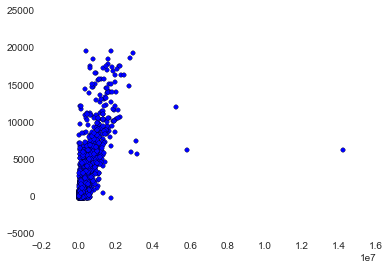

In [399]:
plt.scatter(nyc_energy_20000['Reported Property Floor Area (Building(s)) (ft²)'], nyc_energy_20000['Total GHG Emissions(MtCO2e)'])

Remove really large buildings

In [400]:
nyc_energy_20000 = nyc_energy_20000[nyc_energy_20000['Reported Property Floor Area (Building(s)) (ft²)'] < 1000000]

Should we plot this?

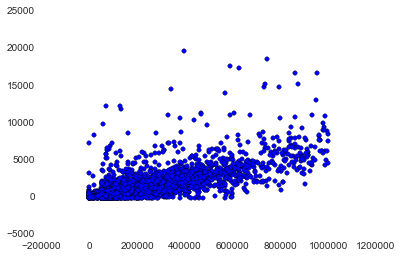

In [401]:
plt.scatter(nyc_energy_20000['Reported Property Floor Area (Building(s)) (ft²)'], nyc_energy_20000['Total GHG Emissions(MtCO2e)'])

Filter for residential only

In [402]:
nyc_housing_energy_set = nyc_energy_20000[nyc_energy_20000['Primary Property Type - Self Selected'] == "Multifamily Housing"]

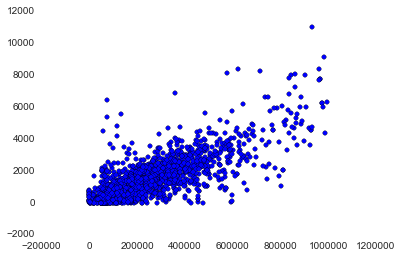

In [403]:
plt.scatter(nyc_housing_energy_set['Reported Property Floor Area (Building(s)) (ft²)'], nyc_housing_energy_set['Total GHG Emissions(MtCO2e)'])

Get LEED ids for projects

Get only necessary columns

In [404]:
final_residential_NYC_for_analysis.columns

Index(['NYC Borough, Block, and Lot (BBL)_x', 'LEED ID', 'NYC Building ID',
       'ID', 'Isconfidential', 'ProjectName', 'Street', 'City', 'State',
       'Zipcode', 'Country', 'LEEDSystemVersionDisplayName', 'PointsAchieved',
       'CertLevel', 'CertDate', 'IsCertified', 'OwnerTypes', 'GrossSqFoot',
       'TotalPropArea', 'ProjectTypes', 'OwnerOrganization',
       'RegistrationDate', 'year', 'BBL', 'Record Number',
       'NYC Borough, Block, and Lot (BBL)_y', 'Co-reported BBL Status',
       'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)', 'Street Number',
       'Borough', 'Zip Code', 'DOF Benchmarking Submission Status',
       'Site EUI(kBtu/ft2)', 'Weather Normalized Site EUI(kBtu/ft2)',
       'Source EUI(kBtu/ft2)', 'Weather Normalized Source EUI(kBtu/ft2)',
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG 

In [405]:
final_residential_NYC = final_residential_NYC_for_analysis[['NYC Borough, Block, and Lot (BBL)_x', 'LEED ID', 'NYC Building ID', 'PointsAchieved','Site EUI(kBtu/ft2)', 'Weather Normalized Site EUI(kBtu/ft2)',
       'Source EUI(kBtu/ft2)', 'Weather Normalized Source EUI(kBtu/ft2)',
       'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'Reported Property Floor Area (Building(s)) (ft²)']]

##LEED dataframe for analysis

In [406]:
final_residential_NYC

,"NYC Borough, Block, and Lot (BBL)_x",LEED ID,NYC Building ID,PointsAchieved,Site EUI(kBtu/ft2),Weather Normalized Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Weather Normalized Source EUI(kBtu/ft2),Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²)
2,1011050029,10000920,1081009,41,98.3,97.7,181.1,180.5,3445.3,1779.8,1665.5,549303
3,1000160195,10001137,1086507,39,111.1,110.5,184.7,184.2,2198.6,1344.5,854.1,322505
5,1010817502,10001324,1087777,30,145.8,145.3,239.6,238.7,2296.7,1428.7,868.0,257796
13,1000167514,10001502,1087238,45,84.2,84.2,151.0,150.4,2426.0,1314.1,1111.9,456414
73,3023327502,10028783,3397446,39,423.4,422.4,891.2,890.1,1724.0,673.0,1051.0,60452
74,1015147502,10029402,1088463,33,60.9,61.0,181.9,182.0,2190.2,108.8,2081.4,453527
75,3020940010,10037297,3391840,34,75.5,75.3,149.6,149.5,1662.2,744.5,917.7,335249
79,1006187504,1000003355,1011095,35,93.1,92.9,223.4,223.2,581.9,153.3,428.6,87608
108,3036220056,10058299,3082733,33,99.4,98.6,137.1,136.2,368.9,286.8,82.1,64496
116,1015317501,10063833,1087920,33,54.1,53.9,117.0,116.8,1395.7,59.5,1336.2,312586


#Scatter of leed buildings, floor area by total ghg

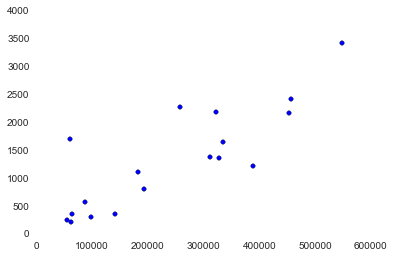

In [407]:
plt.scatter(final_residential_NYC['Reported Property Floor Area (Building(s)) (ft²)'], final_residential_NYC['Total GHG Emissions(MtCO2e)'])

Add columns for calculating floor area of similar buildings

In [408]:
final_residential_NYC['floor_area_minus_10'] = final_residential_NYC['Reported Property Floor Area (Building(s)) (ft²)'] * .9

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [409]:
final_residential_NYC['floor_area_plust_10'] = final_residential_NYC['Reported Property Floor Area (Building(s)) (ft²)'] * 1.1

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [410]:
final_residential_NYC

,"NYC Borough, Block, and Lot (BBL)_x",LEED ID,NYC Building ID,PointsAchieved,Site EUI(kBtu/ft2),Weather Normalized Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Weather Normalized Source EUI(kBtu/ft2),Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),floor_area_minus_10,floor_area_plust_10
2,1011050029,10000920,1081009,41,98.3,97.7,181.1,180.5,3445.3,1779.8,1665.5,549303,494372.7,604233.3
3,1000160195,10001137,1086507,39,111.1,110.5,184.7,184.2,2198.6,1344.5,854.1,322505,290254.5,354755.5
5,1010817502,10001324,1087777,30,145.8,145.3,239.6,238.7,2296.7,1428.7,868.0,257796,232016.4,283575.6
13,1000167514,10001502,1087238,45,84.2,84.2,151.0,150.4,2426.0,1314.1,1111.9,456414,410772.6,502055.4
73,3023327502,10028783,3397446,39,423.4,422.4,891.2,890.1,1724.0,673.0,1051.0,60452,54406.8,66497.2
74,1015147502,10029402,1088463,33,60.9,61.0,181.9,182.0,2190.2,108.8,2081.4,453527,408174.3,498879.7
75,3020940010,10037297,3391840,34,75.5,75.3,149.6,149.5,1662.2,744.5,917.7,335249,301724.1,368773.9
79,1006187504,1000003355,1011095,35,93.1,92.9,223.4,223.2,581.9,153.3,428.6,87608,78847.2,96368.8
108,3036220056,10058299,3082733,33,99.4,98.6,137.1,136.2,368.9,286.8,82.1,64496,58046.4,70945.6
116,1015317501,10063833,1087920,33,54.1,53.9,117.0,116.8,1395.7,59.5,1336.2,312586,281327.4,343844.6


Test for comparison of LEED to non leed

In [411]:
compare_to_leed_10000920 = nyc_housing_energy_set[(nyc_housing_energy_set['Reported Property Floor Area (Building(s)) (ft²)'] > 494372) & (nyc_housing_energy_set['Reported Property Floor Area (Building(s)) (ft²)'] < 604233) & (nyc_housing_energy_set['NYC Borough, Block, and Lot (BBL)'] != 1011050029)]

In [412]:
compare_to_leed_10000920.shape

(85, 24)

Find where to pull data from for comparison means

In [413]:
compare_to_leed_10000920.mean()

Record Number                                                      5.905365e+03
NYC Borough, Block, and Lot (BBL)                                  1.955846e+09
Zip Code                                                           1.047892e+04
Site EUI(kBtu/ft2)                                                 8.108941e+01
Weather Normalized Site EUI(kBtu/ft2)                              8.063200e+01
Source EUI(kBtu/ft2)                                               1.403729e+02
Weather Normalized Source EUI(kBtu/ft2)                            1.396107e+02
Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)    5.736600e+01
ENERGY STAR Score                                                           NaN
Total GHG Emissions(MtCO2e)                                        2.916741e+03
Direct GHG Emissions(MtCO2e)                                       1.528712e+03
Indirect GHG Emissions(MtCO2e)                                     1.388029e+03
Reported Property Floor Area (Building(s

In [414]:
compare_to_leed_10000920.mean()[9]

2916.741176470588

In [415]:
compare_to_leed_10000920.mean()[9]

2916.741176470588

Make new columns for Comparison

In [416]:
final_residential_NYC['Comparison Average Direct GHG'] = 0
final_residential_NYC['Comparison Average Indirect GHG'] = 0
final_residential_NYC['Comparison Average Total GHG'] = 0

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the cav

In [417]:
final_residential_NYC['Comparison Weather Normalized Source EUI(kBtu/ft2)'] = 0

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [418]:
final_residential_NYC['Comparison Average Square Foot'] = 0

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Test adding values to existing data frame

In [419]:
final_residential_NYC.head()

,"NYC Borough, Block, and Lot (BBL)_x",LEED ID,NYC Building ID,PointsAchieved,Site EUI(kBtu/ft2),Weather Normalized Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Weather Normalized Source EUI(kBtu/ft2),Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),floor_area_minus_10,floor_area_plust_10,Comparison Average Direct GHG,Comparison Average Indirect GHG,Comparison Average Total GHG,Comparison Weather Normalized Source EUI(kBtu/ft2),Comparison Average Square Foot
2,1011050029,10000920,1081009,41,98.3,97.7,181.1,180.5,3445.3,1779.8,1665.5,549303,494372.7,604233.3,0,0,0,0,0
3,1000160195,10001137,1086507,39,111.1,110.5,184.7,184.2,2198.6,1344.5,854.1,322505,290254.5,354755.5,0,0,0,0,0
5,1010817502,10001324,1087777,30,145.8,145.3,239.6,238.7,2296.7,1428.7,868.0,257796,232016.4,283575.6,0,0,0,0,0
13,1000167514,10001502,1087238,45,84.2,84.2,151.0,150.4,2426.0,1314.1,1111.9,456414,410772.6,502055.4,0,0,0,0,0
73,3023327502,10028783,3397446,39,423.4,422.4,891.2,890.1,1724.0,673.0,1051.0,60452,54406.8,66497.2,0,0,0,0,0


In [431]:
final_residential_NYC.set_value(2,'Comparison Average Direct GHG',compare_to_leed_10000920.mean()[10])
final_residential_NYC.set_value(2,'Comparison Average Indirect GHG',compare_to_leed_10000920.mean()[11])
final_residential_NYC.set_value(2,'Comparison Average Total GHG',compare_to_leed_10000920.mean()[9])
final_residential_NYC.set_value(2,'Comparison Average Square Foot',compare_to_leed_10000920.mean()[12])
final_residential_NYC.set_value(2,'Comparison Weather Normalized Source EUI(kBtu/ft2)',compare_to_leed_10000920.mean()[6])


,"NYC Borough, Block, and Lot (BBL)_x",LEED ID,NYC Building ID,PointsAchieved,Site EUI(kBtu/ft2),Weather Normalized Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Weather Normalized Source EUI(kBtu/ft2),Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),floor_area_minus_10,floor_area_plust_10,Comparison Average Direct GHG,Comparison Average Indirect GHG,Comparison Average Total GHG,Comparison Weather Normalized Source EUI(kBtu/ft2),Comparison Average Square Foot
2,1011050029,10000920,1081009,41,98.3,97.7,181.1,180.5,3445.3,1779.8,1665.5,549303,494372.7,604233.3,1528,1388,2916,139,551295
3,1000160195,10001137,1086507,39,111.1,110.5,184.7,184.2,2198.6,1344.5,854.1,322505,290254.5,354755.5,982,838,1821,136,320352
5,1010817502,10001324,1087777,30,145.8,145.3,239.6,238.7,2296.7,1428.7,868.0,257796,232016.4,283575.6,0,0,0,0,0
13,1000167514,10001502,1087238,45,84.2,84.2,151.0,150.4,2426.0,1314.1,1111.9,456414,410772.6,502055.4,0,0,0,0,0
73,3023327502,10028783,3397446,39,423.4,422.4,891.2,890.1,1724.0,673.0,1051.0,60452,54406.8,66497.2,0,0,0,0,0
74,1015147502,10029402,1088463,33,60.9,61.0,181.9,182.0,2190.2,108.8,2081.4,453527,408174.3,498879.7,0,0,0,0,0
75,3020940010,10037297,3391840,34,75.5,75.3,149.6,149.5,1662.2,744.5,917.7,335249,301724.1,368773.9,0,0,0,0,0
79,1006187504,1000003355,1011095,35,93.1,92.9,223.4,223.2,581.9,153.3,428.6,87608,78847.2,96368.8,0,0,0,0,0
108,3036220056,10058299,3082733,33,99.4,98.6,137.1,136.2,368.9,286.8,82.1,64496,58046.4,70945.6,0,0,0,0,0
116,1015317501,10063833,1087920,33,54.1,53.9,117.0,116.8,1395.7,59.5,1336.2,312586,281327.4,343844.6,0,0,0,0,0


STEPS

First, filter NYC data on building size.

In [432]:
indexes = [x for x in final_residential_NYC.index]

In [433]:
indexes.remove(2)

In [434]:
indexes

[3, 5, 13, 73, 74, 75, 79, 108, 116, 119, 121, 124, 156, 206, 241, 287, 375]

###Run a test on one variable so can do a for loop with the list of indexes

In [435]:
test_index = 3

In [436]:
final_residential_NYC.loc[test_index,'NYC Borough, Block, and Lot (BBL)_x']

'1000160195'

In [437]:
final_residential_NYC.loc[test_index,'floor_area_plust_10']

354755.5

##Run a test on this to see if it works

In [438]:
mean_compare = nyc_housing_energy_set[(nyc_housing_energy_set['Reported Property Floor Area (Building(s)) (ft²)'] > final_residential_NYC.loc[test_index,'floor_area_minus_10']) & (nyc_housing_energy_set['Reported Property Floor Area (Building(s)) (ft²)'] < final_residential_NYC.loc[test_index,'floor_area_plust_10']) & (nyc_housing_energy_set['NYC Borough, Block, and Lot (BBL)'] != int(final_residential_NYC.loc[test_index,'NYC Borough, Block, and Lot (BBL)_x']))].mean()

In [439]:
mean_compare

Record Number                                                      5.488100e+03
NYC Borough, Block, and Lot (BBL)                                  1.832991e+09
Zip Code                                                           1.043796e+04
Site EUI(kBtu/ft2)                                                 8.204328e+01
Weather Normalized Site EUI(kBtu/ft2)                              8.176201e+01
Source EUI(kBtu/ft2)                                               1.353647e+02
Weather Normalized Source EUI(kBtu/ft2)                            1.361151e+02
Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)    4.603163e+01
ENERGY STAR Score                                                           NaN
Total GHG Emissions(MtCO2e)                                        1.821229e+03
Direct GHG Emissions(MtCO2e)                                       9.827498e+02
Indirect GHG Emissions(MtCO2e)                                     8.384791e+02
Reported Property Floor Area (Building(s

Next, grab the average ghg, etc and put into our data

In [440]:
final_residential_NYC.set_value(test_index,'Comparison Average Direct GHG',mean_compare[10])
final_residential_NYC.set_value(test_index,'Comparison Average Indirect GHG',mean_compare[11])
final_residential_NYC.set_value(test_index,'Comparison Average Total GHG',mean_compare[9])
final_residential_NYC.set_value(test_index,'Comparison Average Square Foot',mean_compare[12])
final_residential_NYC.set_value(test_index,'Comparison Weather Normalized Source EUI(kBtu/ft2)',mean_compare[6])


,"NYC Borough, Block, and Lot (BBL)_x",LEED ID,NYC Building ID,PointsAchieved,Site EUI(kBtu/ft2),Weather Normalized Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Weather Normalized Source EUI(kBtu/ft2),Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),floor_area_minus_10,floor_area_plust_10,Comparison Average Direct GHG,Comparison Average Indirect GHG,Comparison Average Total GHG,Comparison Weather Normalized Source EUI(kBtu/ft2),Comparison Average Square Foot
2,1011050029,10000920,1081009,41,98.3,97.7,181.1,180.5,3445.3,1779.8,1665.5,549303,494372.7,604233.3,1528,1388,2916,139,551295
3,1000160195,10001137,1086507,39,111.1,110.5,184.7,184.2,2198.6,1344.5,854.1,322505,290254.5,354755.5,982,838,1821,136,320352
5,1010817502,10001324,1087777,30,145.8,145.3,239.6,238.7,2296.7,1428.7,868.0,257796,232016.4,283575.6,0,0,0,0,0
13,1000167514,10001502,1087238,45,84.2,84.2,151.0,150.4,2426.0,1314.1,1111.9,456414,410772.6,502055.4,0,0,0,0,0
73,3023327502,10028783,3397446,39,423.4,422.4,891.2,890.1,1724.0,673.0,1051.0,60452,54406.8,66497.2,0,0,0,0,0
74,1015147502,10029402,1088463,33,60.9,61.0,181.9,182.0,2190.2,108.8,2081.4,453527,408174.3,498879.7,0,0,0,0,0
75,3020940010,10037297,3391840,34,75.5,75.3,149.6,149.5,1662.2,744.5,917.7,335249,301724.1,368773.9,0,0,0,0,0
79,1006187504,1000003355,1011095,35,93.1,92.9,223.4,223.2,581.9,153.3,428.6,87608,78847.2,96368.8,0,0,0,0,0
108,3036220056,10058299,3082733,33,99.4,98.6,137.1,136.2,368.9,286.8,82.1,64496,58046.4,70945.6,0,0,0,0,0
116,1015317501,10063833,1087920,33,54.1,53.9,117.0,116.8,1395.7,59.5,1336.2,312586,281327.4,343844.6,0,0,0,0,0


##WORKED, so can use in a for loop to get all comparison values.

In [441]:
indexes = [5, 13, 73, 74, 75, 79, 108, 116, 119, 121, 124, 156, 206, 241, 287, 375]
for test_index in indexes:
    mean_compare = nyc_housing_energy_set[(nyc_housing_energy_set['Reported Property Floor Area (Building(s)) (ft²)'] > final_residential_NYC.loc[test_index,'floor_area_minus_10']) & (nyc_housing_energy_set['Reported Property Floor Area (Building(s)) (ft²)'] < final_residential_NYC.loc[test_index,'floor_area_plust_10']) & (nyc_housing_energy_set['NYC Borough, Block, and Lot (BBL)'] != int(final_residential_NYC.loc[test_index,'NYC Borough, Block, and Lot (BBL)_x']))].mean()
    final_residential_NYC.set_value(test_index,'Comparison Average Direct GHG',mean_compare[10])
    final_residential_NYC.set_value(test_index,'Comparison Average Indirect GHG',mean_compare[11])
    final_residential_NYC.set_value(test_index,'Comparison Average Total GHG',mean_compare[9])
    final_residential_NYC.set_value(test_index,'Comparison Average Square Foot',mean_compare[12])
    final_residential_NYC.set_value(test_index,'Comparison Weather Normalized Source EUI(kBtu/ft2)',mean_compare[6])
final_residential_NYC    

,"NYC Borough, Block, and Lot (BBL)_x",LEED ID,NYC Building ID,PointsAchieved,Site EUI(kBtu/ft2),Weather Normalized Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Weather Normalized Source EUI(kBtu/ft2),Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),floor_area_minus_10,floor_area_plust_10,Comparison Average Direct GHG,Comparison Average Indirect GHG,Comparison Average Total GHG,Comparison Weather Normalized Source EUI(kBtu/ft2),Comparison Average Square Foot
2,1011050029,10000920,1081009,41,98.3,97.7,181.1,180.5,3445.3,1779.8,1665.5,549303,494372.7,604233.3,1528,1388,2916,139,551295
3,1000160195,10001137,1086507,39,111.1,110.5,184.7,184.2,2198.6,1344.5,854.1,322505,290254.5,354755.5,982,838,1821,136,320352
5,1010817502,10001324,1087777,30,145.8,145.3,239.6,238.7,2296.7,1428.7,868.0,257796,232016.4,283575.6,904,588,1492,136,255573
13,1000167514,10001502,1087238,45,84.2,84.2,151.0,150.4,2426.0,1314.1,1111.9,456414,410772.6,502055.4,1375,1051,2426,134,454204
73,3023327502,10028783,3397446,39,423.4,422.4,891.2,890.1,1724.0,673.0,1051.0,60452,54406.8,66497.2,268,88,357,127,60458
74,1015147502,10029402,1088463,33,60.9,61.0,181.9,182.0,2190.2,108.8,2081.4,453527,408174.3,498879.7,1411,1004,2415,133,450016
75,3020940010,10037297,3391840,34,75.5,75.3,149.6,149.5,1662.2,744.5,917.7,335249,301724.1,368773.9,1046,863,1909,137,334501
79,1006187504,1000003355,1011095,35,93.1,92.9,223.4,223.2,581.9,153.3,428.6,87608,78847.2,96368.8,347,136,484,123,86928
108,3036220056,10058299,3082733,33,99.4,98.6,137.1,136.2,368.9,286.8,82.1,64496,58046.4,70945.6,281,94,375,125,64167
116,1015317501,10063833,1087920,33,54.1,53.9,117.0,116.8,1395.7,59.5,1336.2,312586,281327.4,343844.6,963,797,1760,137,309552


In [442]:
final_residential_NYC['normalizer_of_comparisons'] = final_residential_NYC['Reported Property Floor Area (Building(s)) (ft²)']/final_residential_NYC['Comparison Average Square Foot']

/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [443]:
final_residential_NYC

,"NYC Borough, Block, and Lot (BBL)_x",LEED ID,NYC Building ID,PointsAchieved,Site EUI(kBtu/ft2),Weather Normalized Site EUI(kBtu/ft2),Source EUI(kBtu/ft2),Weather Normalized Source EUI(kBtu/ft2),Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),floor_area_minus_10,floor_area_plust_10,Comparison Average Direct GHG,Comparison Average Indirect GHG,Comparison Average Total GHG,Comparison Weather Normalized Source EUI(kBtu/ft2),Comparison Average Square Foot,normalizer_of_comparisons
2,1011050029,10000920,1081009,41,98.3,97.7,181.1,180.5,3445.3,1779.8,1665.5,549303,494372.7,604233.3,1528,1388,2916,139,551295,0.996387
3,1000160195,10001137,1086507,39,111.1,110.5,184.7,184.2,2198.6,1344.5,854.1,322505,290254.5,354755.5,982,838,1821,136,320352,1.006721
5,1010817502,10001324,1087777,30,145.8,145.3,239.6,238.7,2296.7,1428.7,868.0,257796,232016.4,283575.6,904,588,1492,136,255573,1.008698
13,1000167514,10001502,1087238,45,84.2,84.2,151.0,150.4,2426.0,1314.1,1111.9,456414,410772.6,502055.4,1375,1051,2426,134,454204,1.004866
73,3023327502,10028783,3397446,39,423.4,422.4,891.2,890.1,1724.0,673.0,1051.0,60452,54406.8,66497.2,268,88,357,127,60458,0.999901
74,1015147502,10029402,1088463,33,60.9,61.0,181.9,182.0,2190.2,108.8,2081.4,453527,408174.3,498879.7,1411,1004,2415,133,450016,1.007802
75,3020940010,10037297,3391840,34,75.5,75.3,149.6,149.5,1662.2,744.5,917.7,335249,301724.1,368773.9,1046,863,1909,137,334501,1.002236
79,1006187504,1000003355,1011095,35,93.1,92.9,223.4,223.2,581.9,153.3,428.6,87608,78847.2,96368.8,347,136,484,123,86928,1.007823
108,3036220056,10058299,3082733,33,99.4,98.6,137.1,136.2,368.9,286.8,82.1,64496,58046.4,70945.6,281,94,375,125,64167,1.005127
116,1015317501,10063833,1087920,33,54.1,53.9,117.0,116.8,1395.7,59.5,1336.2,312586,281327.4,343844.6,963,797,1760,137,309552,1.009801


They don't need to be normalized, the averages are all super close.

In [444]:
nyc_df_compare = final_residential_NYC[['LEED ID', 'Weather Normalized Source EUI(kBtu/ft2)', 
                                        "Comparison Weather Normalized Source EUI(kBtu/ft2)", 
                                        "Total GHG Emissions(MtCO2e)", 
                                        "Comparison Average Total GHG",  
                                        "Direct GHG Emissions(MtCO2e)", 
                                        "Comparison Average Direct GHG", 
                                        "Indirect GHG Emissions(MtCO2e)", 
                                        "Comparison Average Indirect GHG"]]

Some do better, some do worse, overall they are not that great.  Might be interesting to note that none of these buildings do great on overall leed score, so they probably didn't go for any of the expensive high performance energy credits that would help the actual performance

In [447]:
nyc_df_compare

,LEED ID,Weather Normalized Source EUI(kBtu/ft2),Comparison Weather Normalized Source EUI(kBtu/ft2),Total GHG Emissions(MtCO2e),Comparison Average Total GHG,Direct GHG Emissions(MtCO2e),Comparison Average Direct GHG,Indirect GHG Emissions(MtCO2e),Comparison Average Indirect GHG
2,10000920,180.5,139,3445.3,2916,1779.8,1528,1665.5,1388
3,10001137,184.2,136,2198.6,1821,1344.5,982,854.1,838
5,10001324,238.7,136,2296.7,1492,1428.7,904,868.0,588
13,10001502,150.4,134,2426.0,2426,1314.1,1375,1111.9,1051
73,10028783,890.1,127,1724.0,357,673.0,268,1051.0,88
74,10029402,182.0,133,2190.2,2415,108.8,1411,2081.4,1004
75,10037297,149.5,137,1662.2,1909,744.5,1046,917.7,863
79,1000003355,223.2,123,581.9,484,153.3,347,428.6,136
108,10058299,136.2,125,368.9,375,286.8,281,82.1,94
116,10063833,116.8,137,1395.7,1760,59.5,963,1336.2,797


In [446]:
nyc_df_compare.to_pickle("nyc_energy_comparison_josh.pkl")